<a href="https://colab.research.google.com/github/SpringBoardMentor193s/SentinelNet_Oct_Batch/blob/ganesh/correlatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
print("pandas imported as pd")

pandas imported as pd


In [ ]:
df_train = pd.read_csv('/content/kdd_train.csv')
df_test = pd.read_csv('/content/kdd_test.csv')

print('df_train head:')
print(df_train.head())
print('\n')
print('df_test head:')
print(df_test.head())

df_train head:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10             

In [ ]:
print('df_train info:')
df_train.info()
print('\n')
print('df_test info:')
df_test.info()

df_train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-nul

In [ ]:
numerical_cols_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical columns in df_train:")
print(numerical_cols_train)
print("\nNumerical columns in df_test:")
print(numerical_cols_test)

# Confirm that both lists are identical for consistency
if numerical_cols_train == numerical_cols_test:
    print("\nNumerical column lists for df_train and df_test are identical.")
    numerical_columns = numerical_cols_train
else:
    print("\nNumerical column lists for df_train and df_test differ. Please investigate.")
    numerical_columns = list(set(numerical_cols_train + numerical_cols_test)) # Combine if they differ

print(f"\nCommon numerical columns prepared for correlation analysis: {len(numerical_columns)} columns")

Numerical columns in df_train:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

Numerical columns in df_test:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outboun

In [ ]:
correlation_matrix_train = df_train[numerical_columns].corr()
correlation_matrix_test = df_test[numerical_columns].corr()

print("Correlation matrix for df_train calculated.")
print("Correlation matrix for df_test calculated.")

Correlation matrix for df_train calculated.
Correlation matrix for df_test calculated.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Seaborn and Matplotlib imported.")

Seaborn and Matplotlib imported.


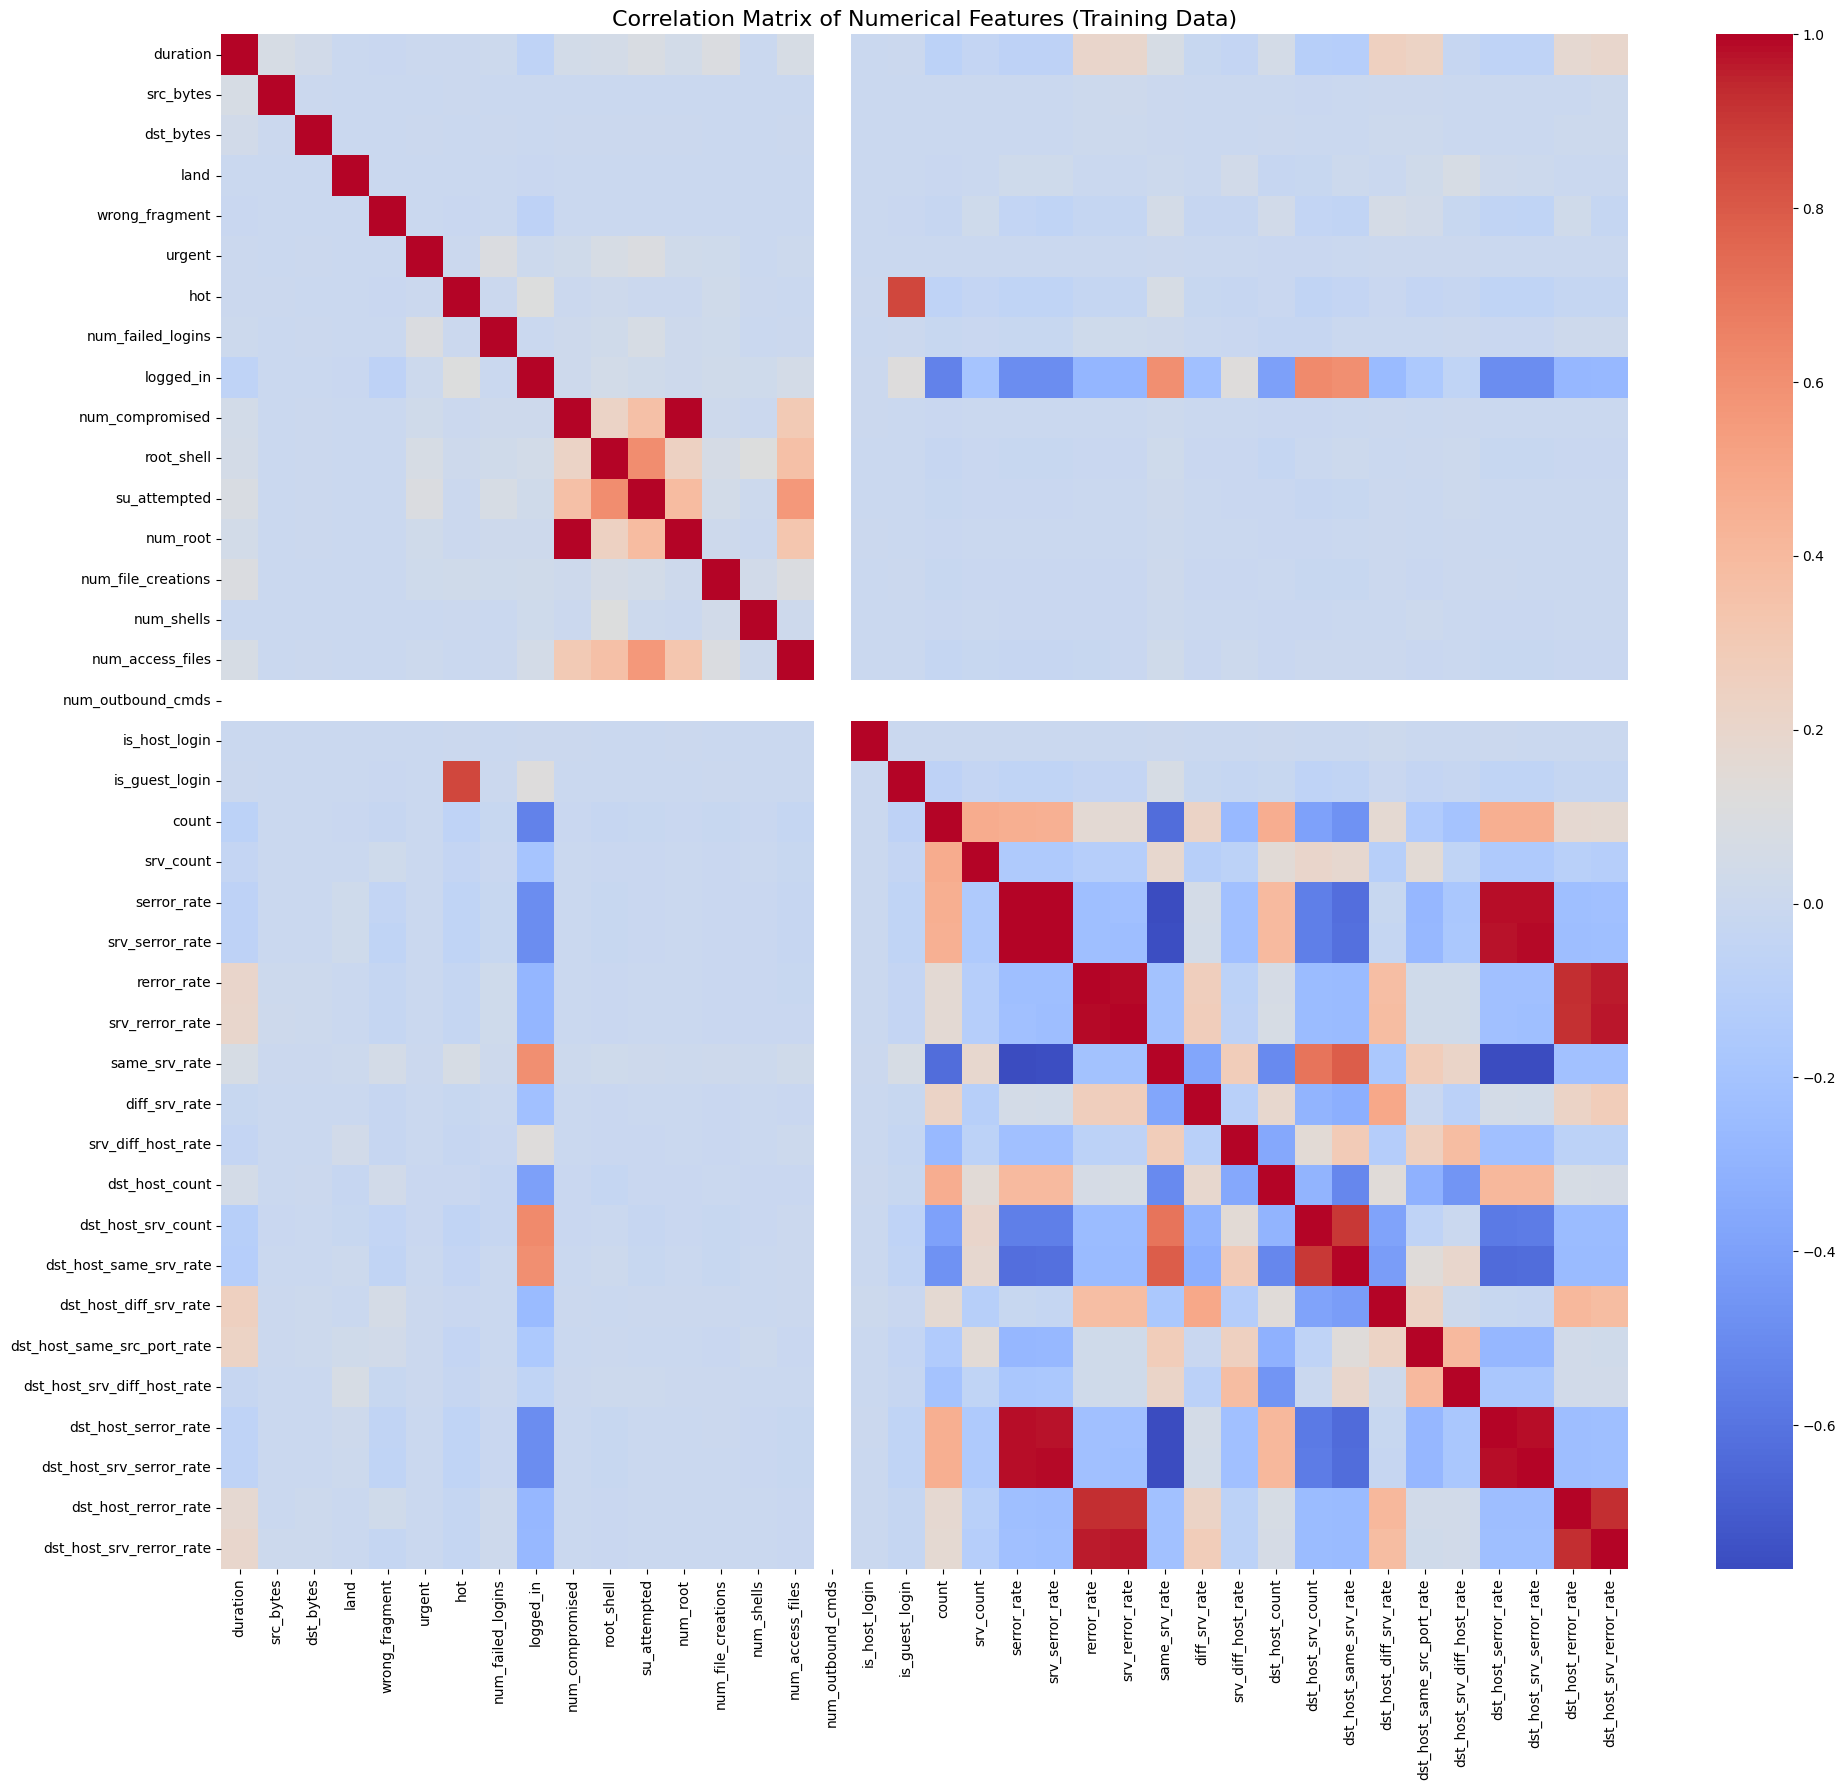

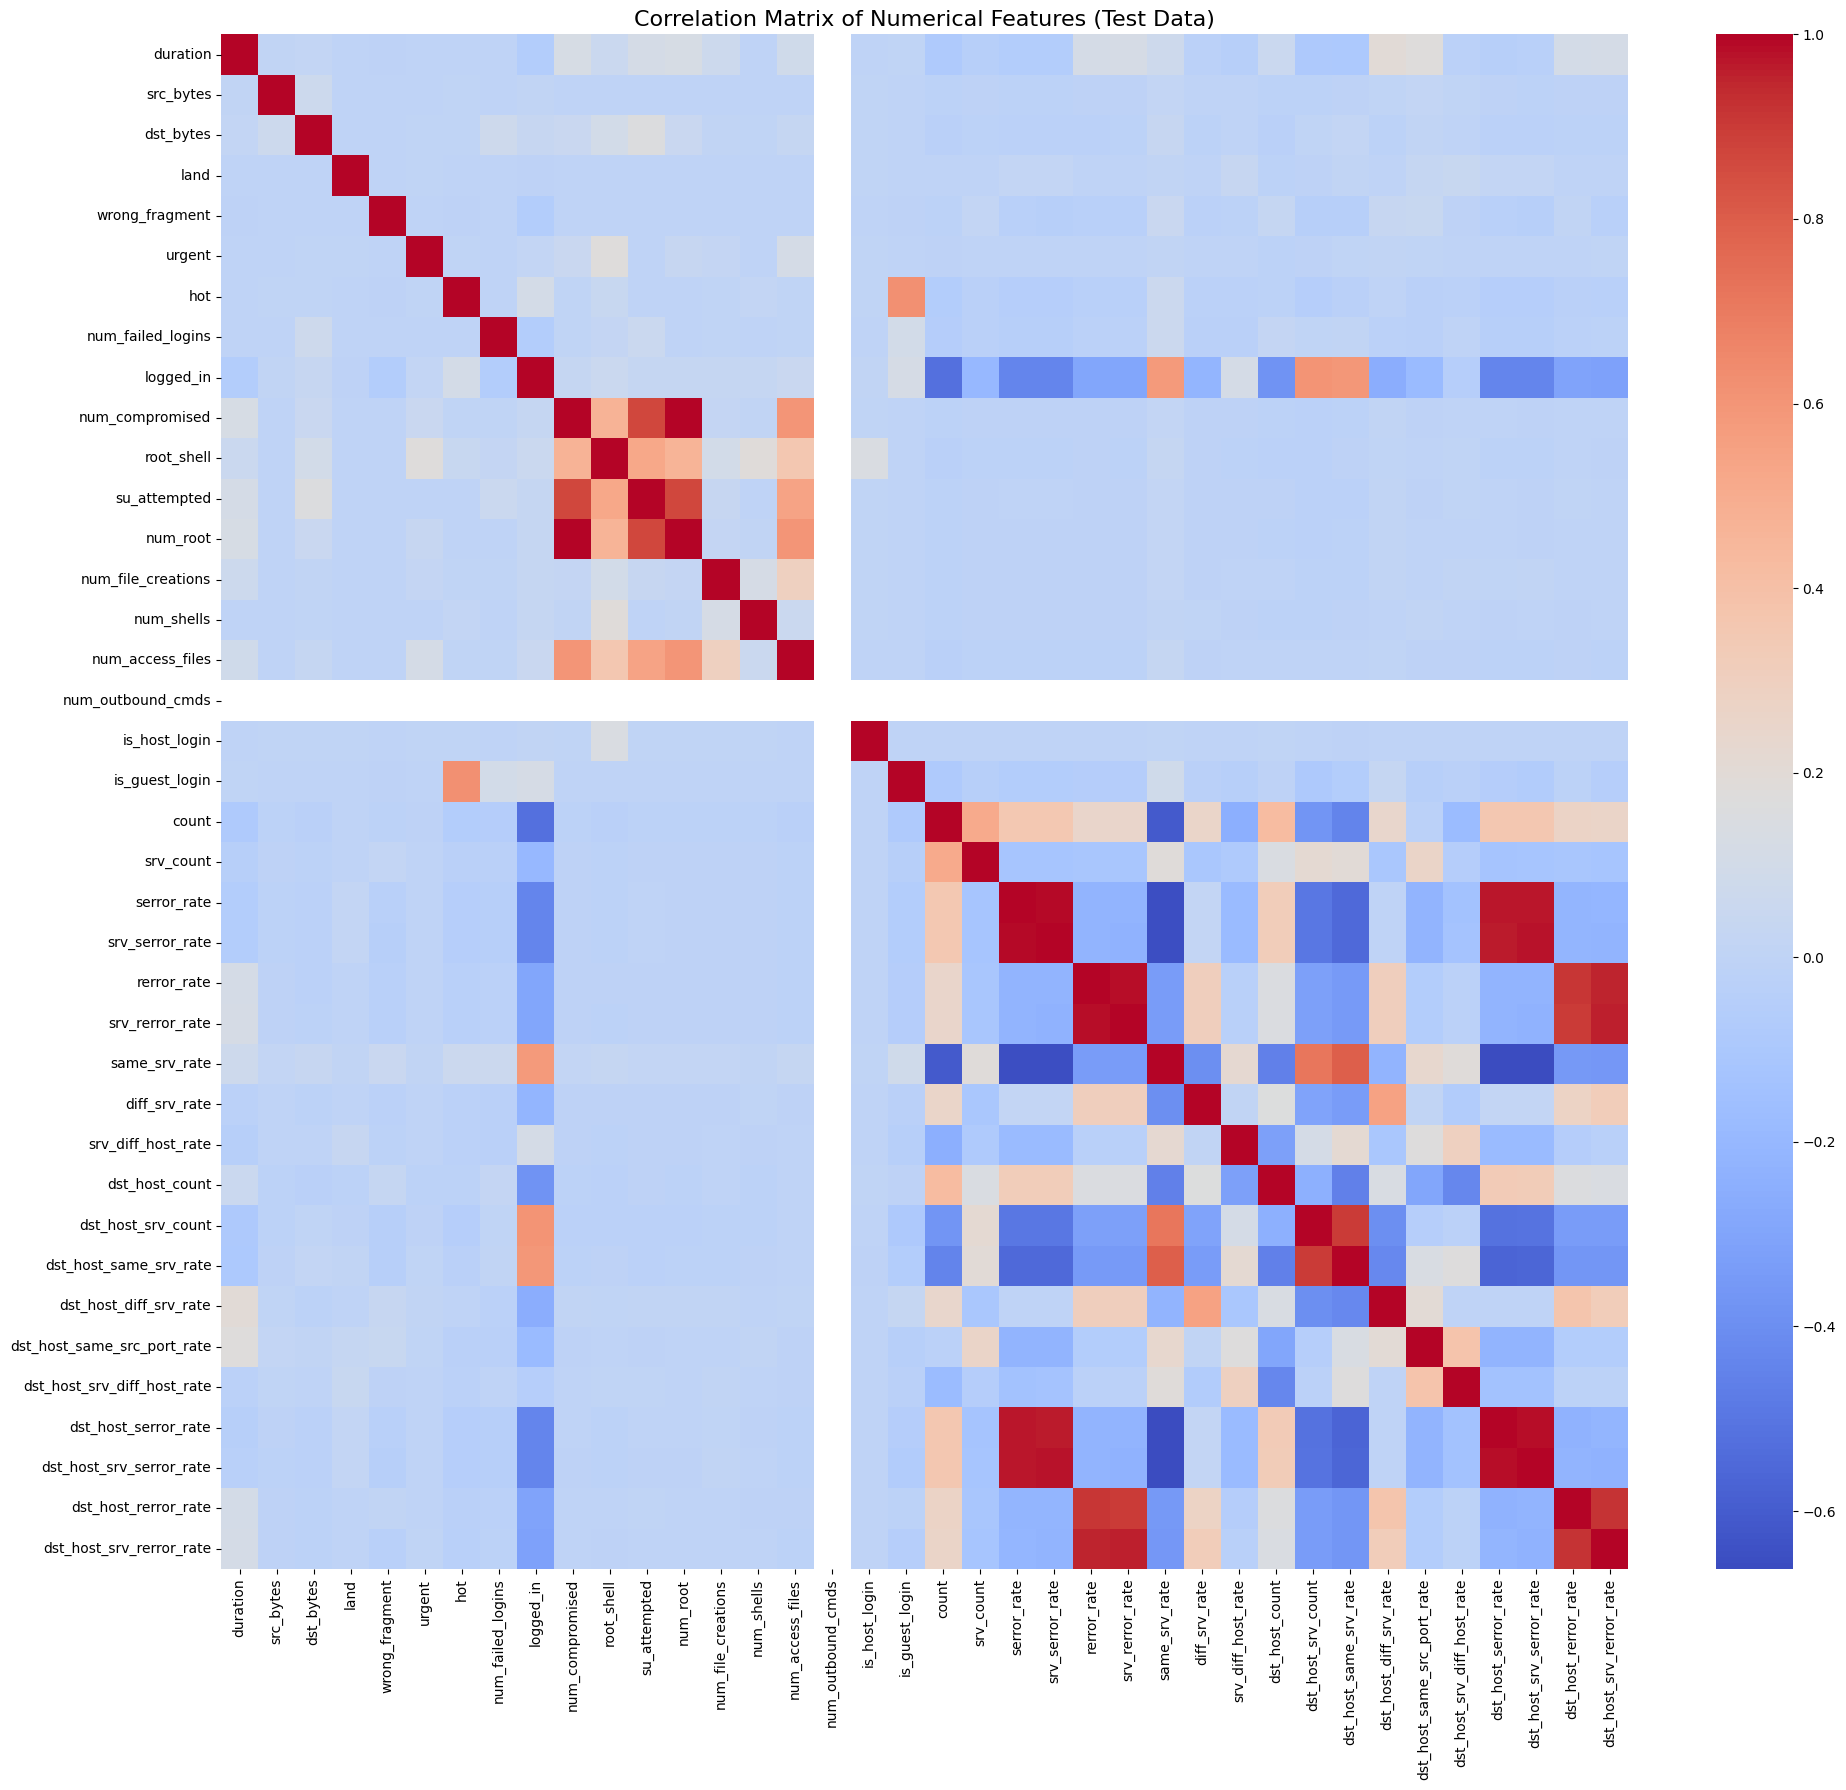

Heatmaps for training and test correlation matrices displayed.


In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_train, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Training Data)', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_test, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Test Data)', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Heatmaps for training and test correlation matrices displayed.")